In [2]:
from pipeline import *
from utils import *
%load_ext autoreload
%autoreload 2

# A2390C

### Subtract background for SE

In [3]:
df0 = DeepFrame("/home/qliu/data/2152921p.deep.fits", name='A2390C')
df0.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
EXTEND  =                    T                                                  
PROGRAM = 'ORB v2.1.0'         / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2017-09-28'         / Creation date                                  
MASK    = 'False   '                                                            
COMMENT                                                                         
COMMENT General                                                                 
COMMENT -------                                                                 
COMMENT                     

In [2]:
tab_sdss = df0.crossmatch_sdss(radius=7*u.arcmin,mag_max=18)
coords = np.vstack([np.array(tab_sdss["RA_ICRS"]), np.array(tab_sdss["DE_ICRS"])]).T
star_pos = df0.wcs.all_world2pix(coords, 0)

plt.figure(figsize=(8,8))
ax = plt.subplot(projection=df0.wcs)
plt.scatter(star_pos[:,0], star_pos[:,1], facecolor="none", edgecolor="r")
plt.imshow(df0.image, norm=norm1, origin="lower", vmin=np.median(df0.image), vmax=1e4)

Saved background subtracted image as A2390C_DF_noSE.fits


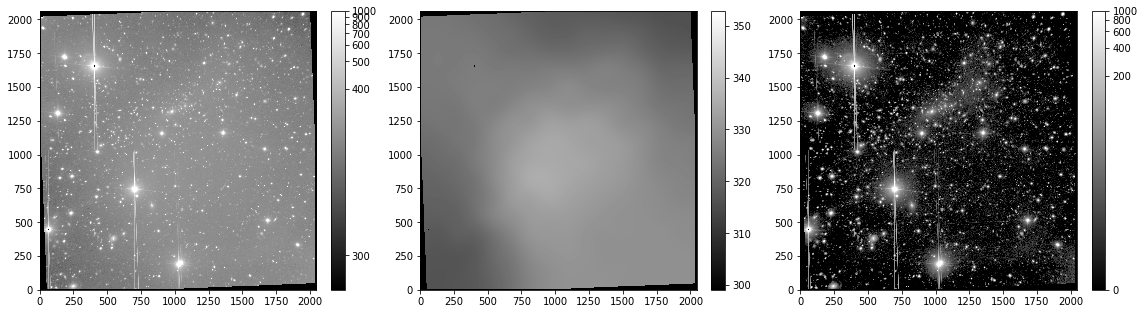

In [5]:
df0.make_mask_edge(save_path='./proc/A2390C/')
df0.subtract_background(display=True, plot=True, save_path='./proc/A2390C/', suffix='_noSE')

### Run SE for a second time to derive seeing and more accurate background

In [28]:
df = DeepFrame("./proc/A2390C_DF_noSE.fits", name='A2390C',
               SE_catalog='./A2390C/SE_DF/A2390C_DF_run1m.cat',
               seg_map='./A2390C/SE_DF/segm_m1.fits',
               mask_edge="./proc/A2390C_edge.fits")

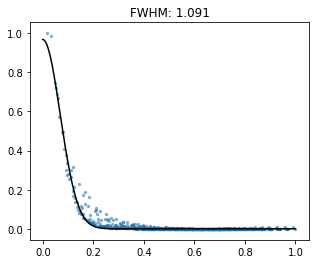

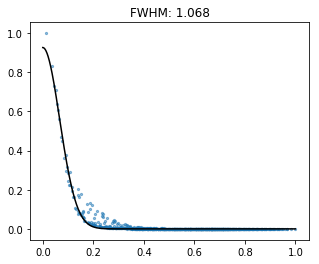

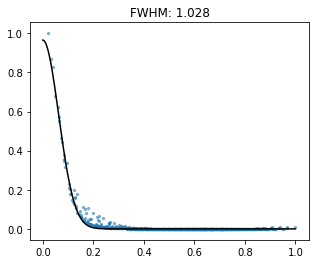

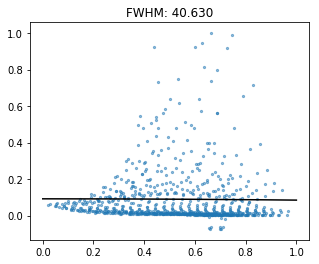

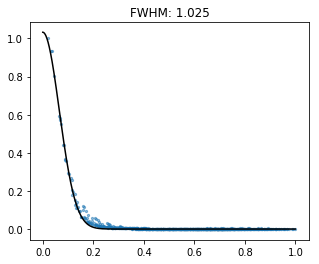

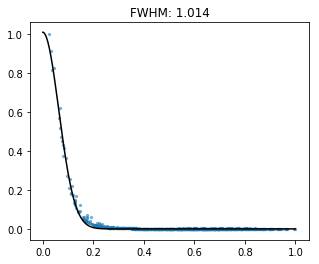

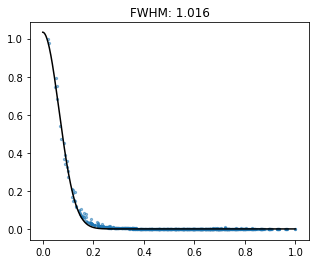

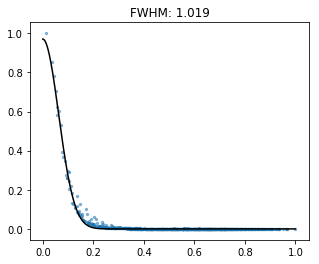

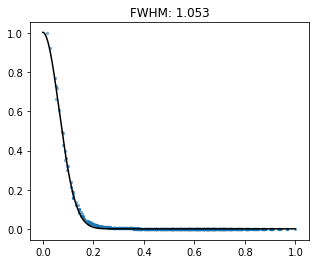

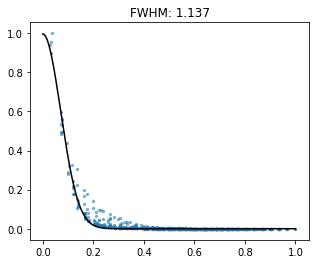

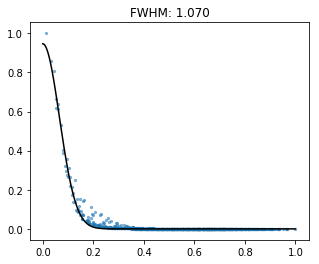

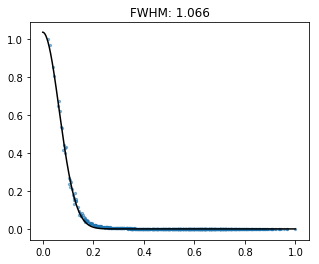

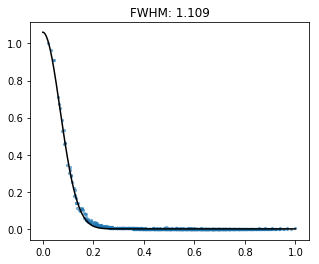

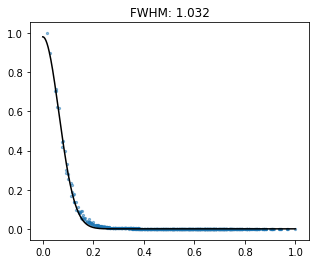

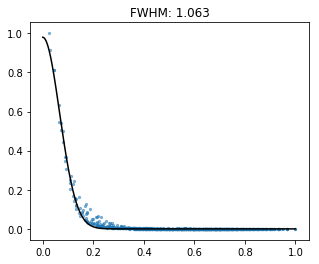

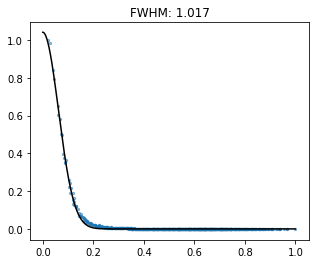

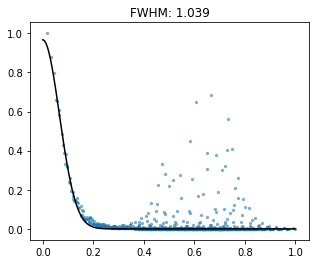

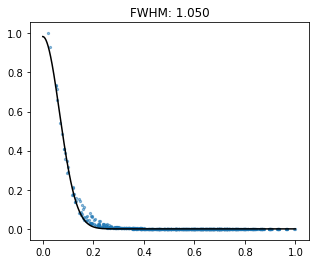

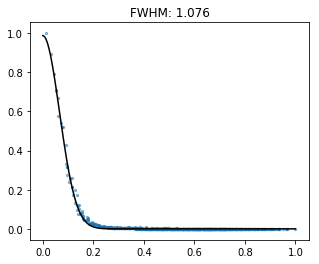

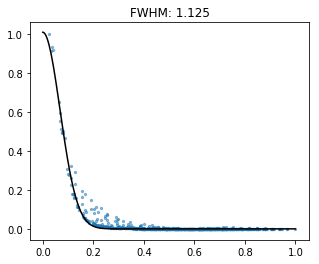

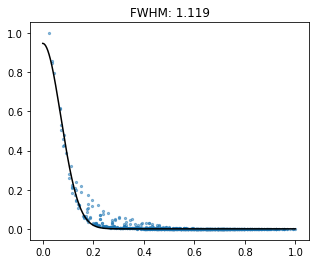

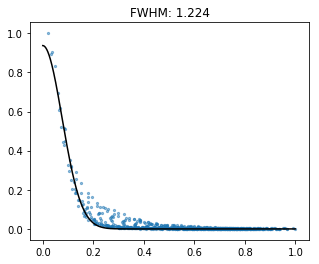

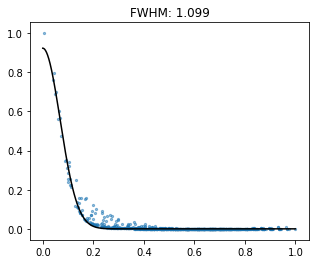

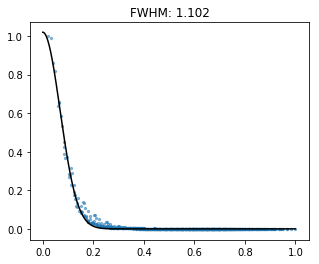

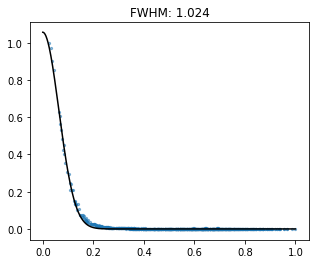

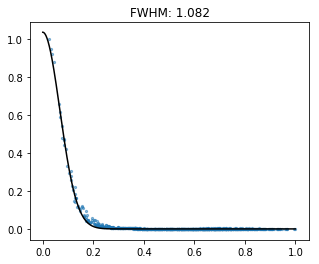

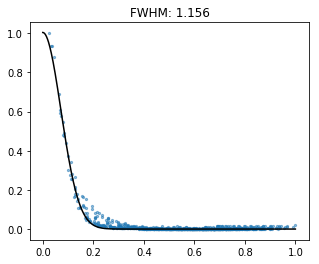

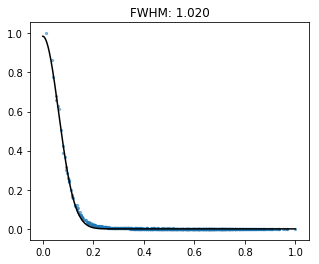

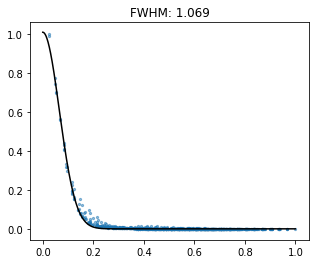

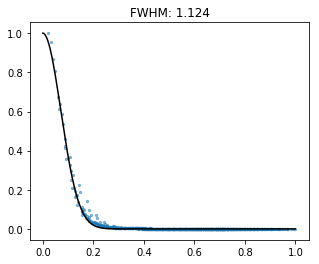

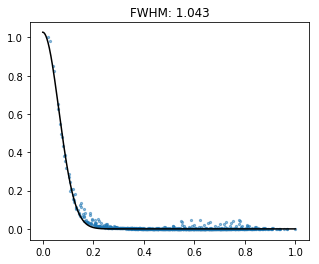

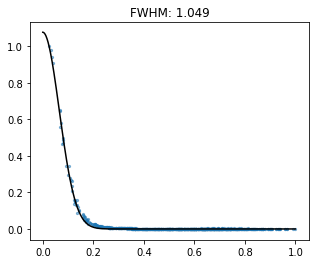

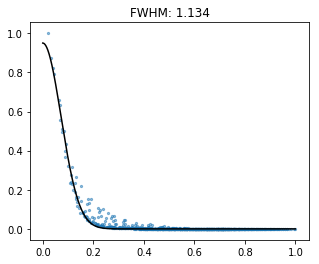

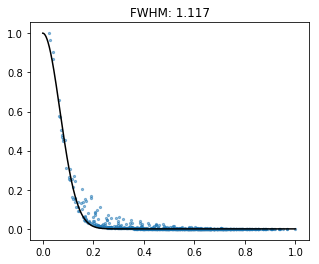

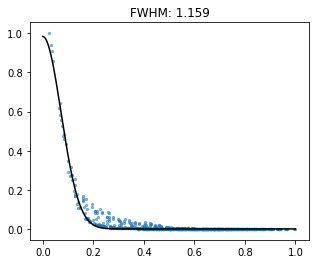

Median seeing FWHM in arcsec: 1.069


In [29]:
df.calculate_seeing()

Subtract background for a second time, this time the source is masked.

Saved background subtracted image as A2390C_DF.fits


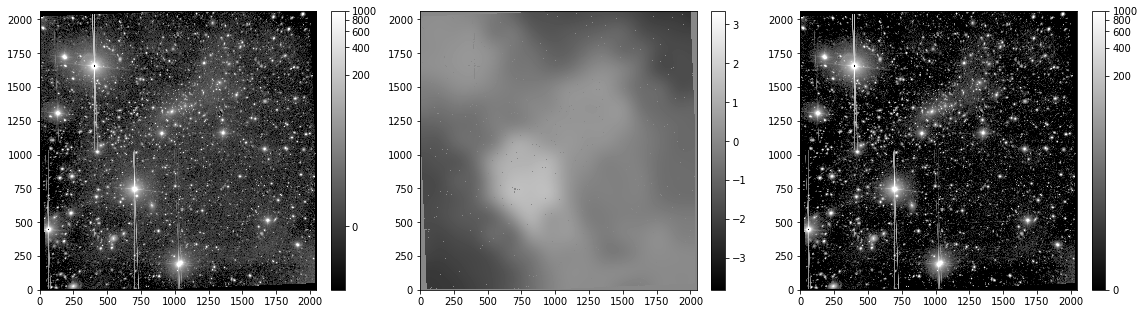

In [30]:
df.subtract_background(display=True, plot=True, save_path='./proc/A2390C/')

<Figure size 864x648 with 0 Axes>

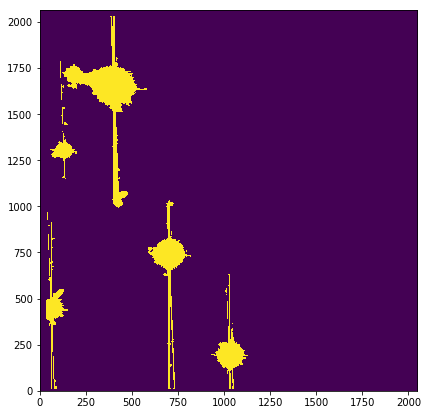

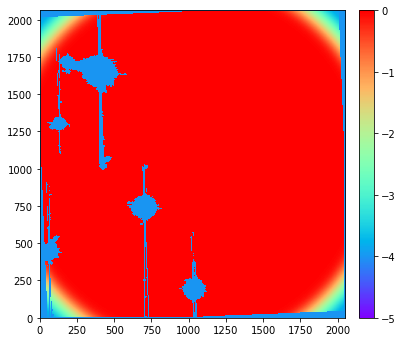

In [32]:
df.make_mask_streak("./proc/A2390C/A2390C_DF.fits", threshold=3, shape_cut=0.15, area_cut=500)
df.make_weight_map(thre=0.58, wt_min=1e-4, save_path="./proc/A2390C/")

# A2390E

In [88]:
df0 = DeepFrame("/home/qliu/data/A2390F/A2390SE_C4.merged.InterferogramMerger.deep_frame.fits", name='A2390E')
df0.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
EXTEND  =                    T                                                  
PROGRAM = 'ORB v3.1.2'         / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2017-11-08'         / Creation date                                  
MASK    = 'False   '                                                            
COMMENT                                                                         
COMMENT General                                                                 
COMMENT -------                                                                 
COMMENT                     

WCS info is lacked in the given deepframe, so we use wcs from datacube.

In [89]:
cube0 = Read_Datacube("/home/qliu/data/A2390F/A2390SEC4.fits", name='A2390E')
df0.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


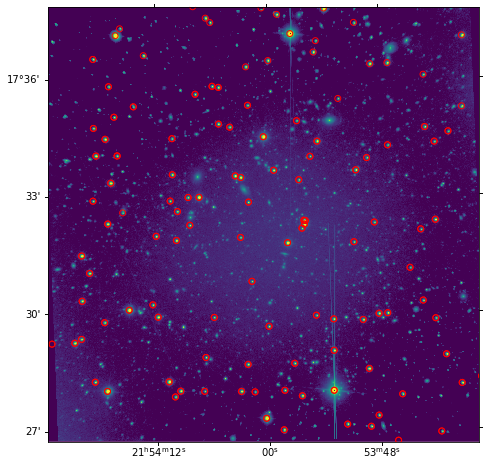

In [90]:
tab_sdss = df0.crossmatch_sdss(radius=7*u.arcmin,mag_max=18)
coords = np.vstack([np.array(tab_sdss["RA_ICRS"]), np.array(tab_sdss["DE_ICRS"])]).T
star_pos = df0.wcs.all_world2pix(coords, 0)

plt.figure(figsize=(8,8))
ax = plt.subplot(projection=df0.wcs)
plt.scatter(star_pos[:,0], star_pos[:,1], facecolor="none", edgecolor="r")
plt.imshow(df0.image, norm=norm1, origin="lower", vmin=np.median(df0.image), vmax=1e4)

Saved background subtracted image as A2390E_DF_noSE.fits


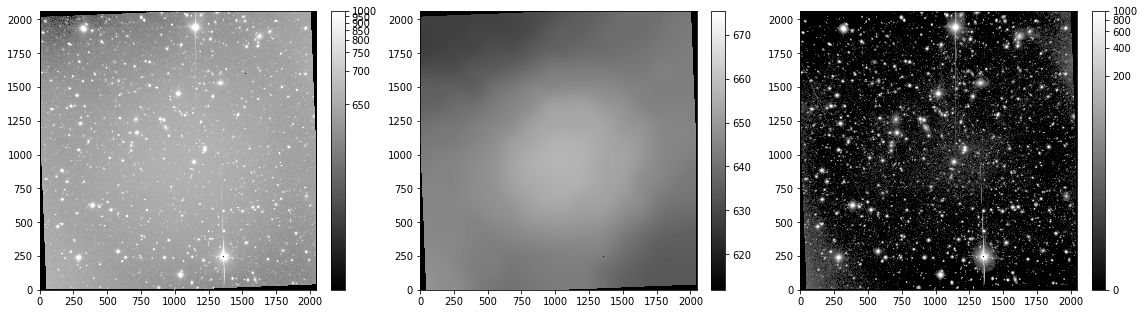

In [91]:
df0.make_mask_edge(save_path='./proc/A2390E/')
df0.subtract_background(display=True, plot=True, save_path='./proc/A2390E/', suffix='_noSE')

In [110]:
df = DeepFrame("./proc/A2390E/A2390E_DF_noSE.fits", name='A2390E',
               SE_catalog='./A2390SE/SE_DF/A2390E_DF_run1m.cat',
               seg_map='./A2390SE/SE_DF/segm_m1.fits',
               mask_edge="./proc/A2390E/A2390E_DF_edge.fits")
df.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


NUMBER  FLUX_ISO FLUX_AUTO FLUXERR_AUTO ... B_IMAGE FLAGS ELONGATION CLASS_STAR
           ct        ct         ct      ...   pix                              
------ --------- --------- ------------ ... ------- ----- ---------- ----------
    74  214094.9  341805.4     671.0215 ...   0.935     0      1.107        1.0
    81  228148.2  350095.8     679.1255 ...   0.938     0      1.145        1.0
    94  233678.4  365760.5     694.1039 ...   0.925     0      1.141        1.0
   102 4787382.0 7049700.0     3045.849 ...   1.833     4      1.121        1.0
   117  190428.9  292565.8     620.8864 ...    0.94     0      1.147        1.0
   165  85971.66  139013.7     428.3694 ...   0.934     0      1.182        1.0
   174  388092.0  585197.0     877.7722 ...    0.95     0       1.09        1.0
   180  150027.0  239302.2     561.6151 ...   0.934     0      1.154        1.0
   195  603858.6  877329.6     1074.653 ...   0.976     0      1.035        1.0
   196  65768.45  100142.8     363.7012 

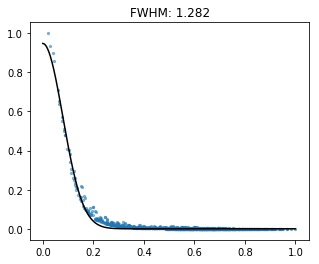

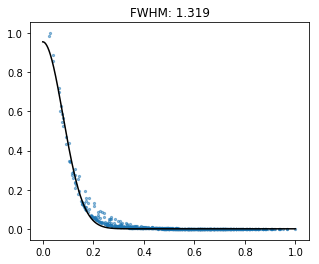

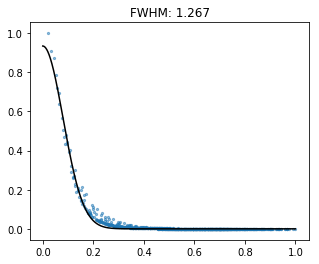

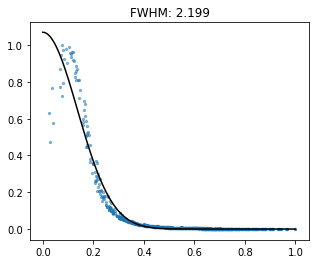

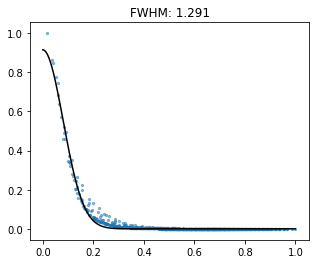

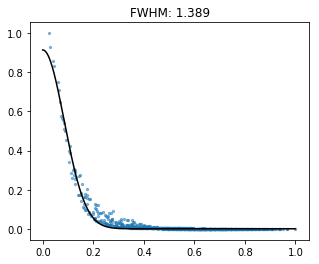

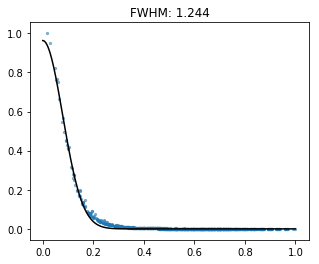

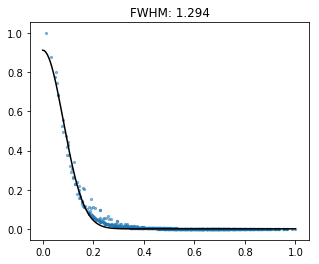

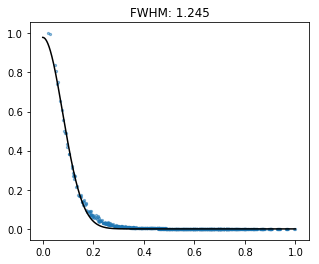

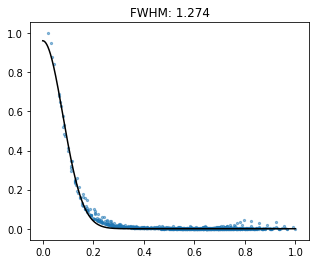

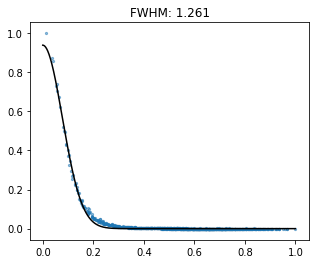

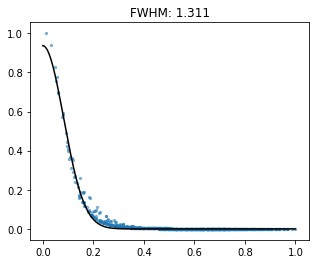

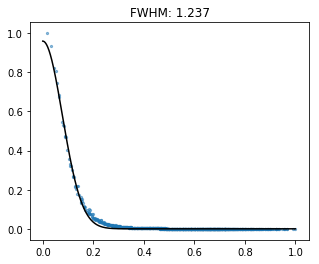

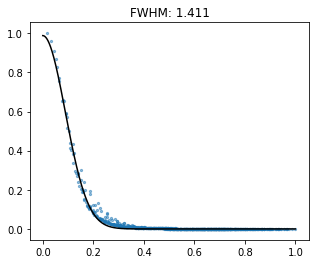

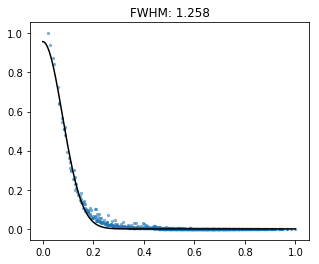

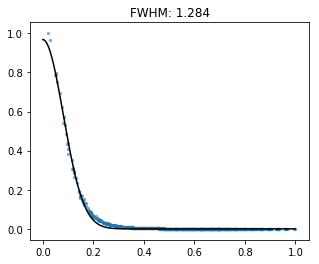

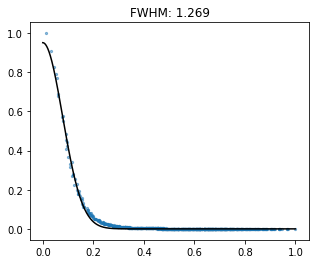

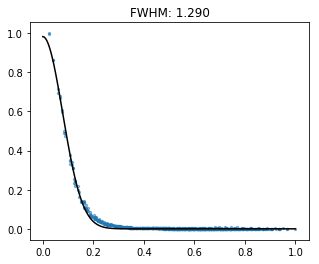

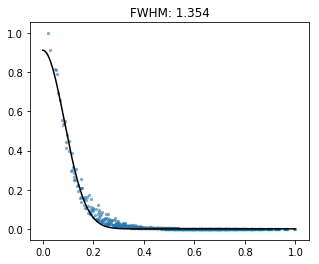

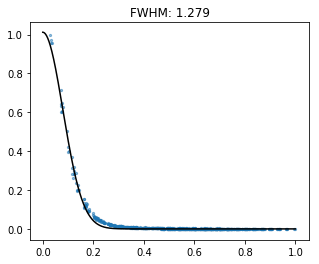

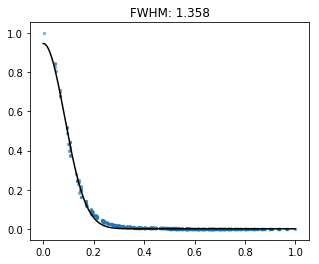

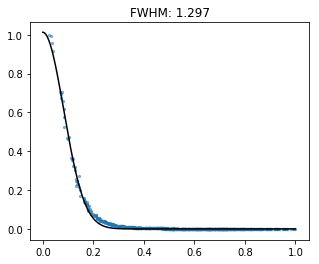

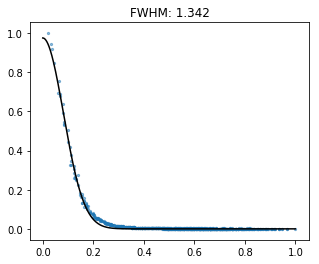

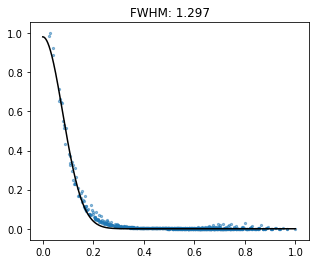

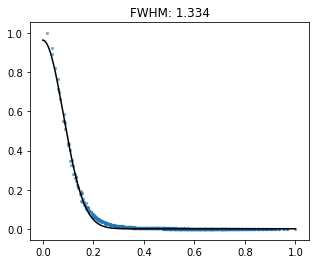

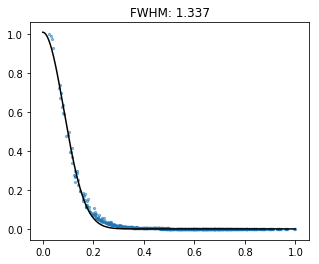

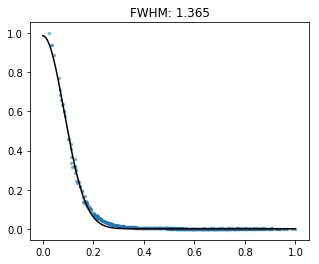

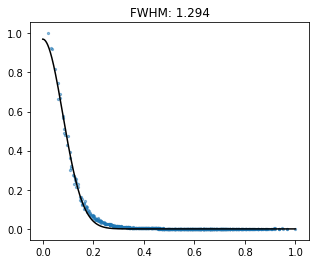

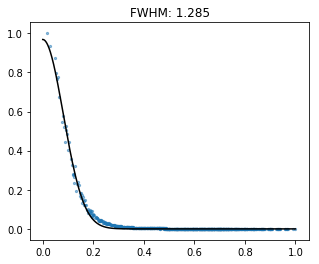

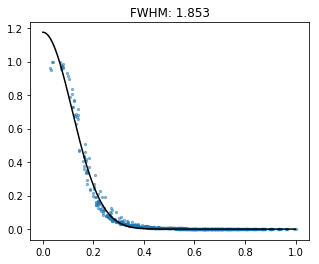

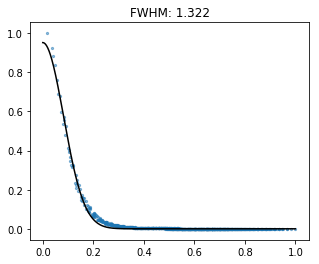

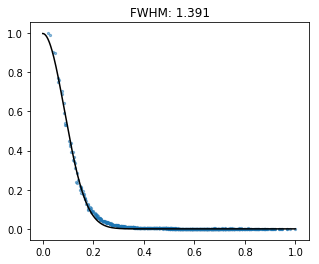

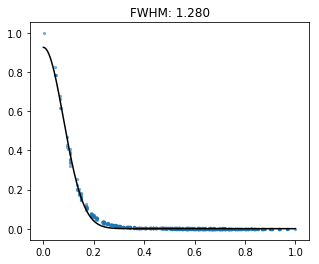

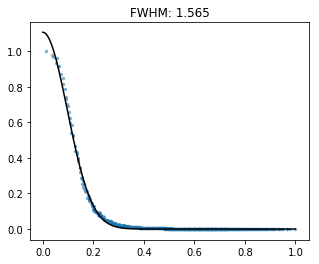

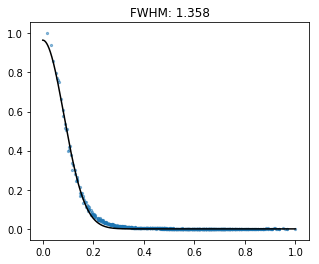

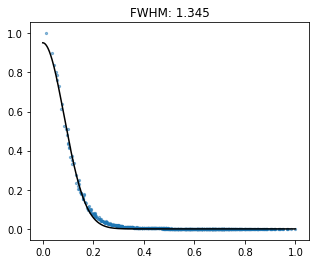

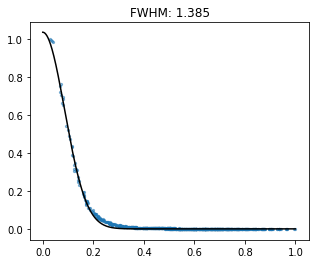

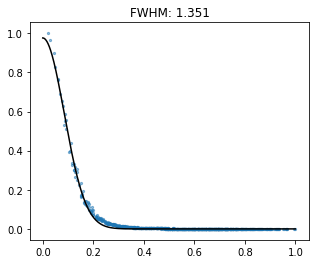

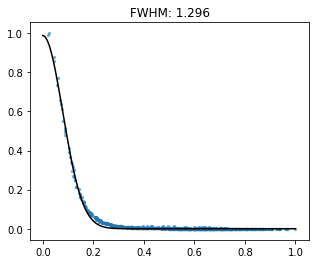

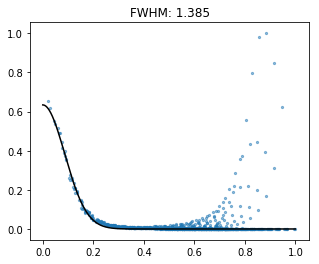

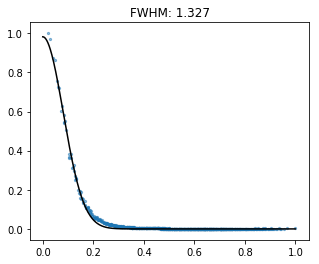

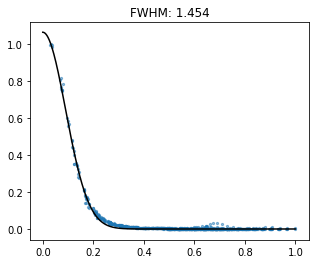

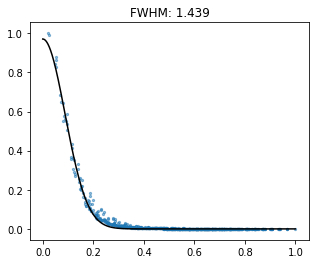

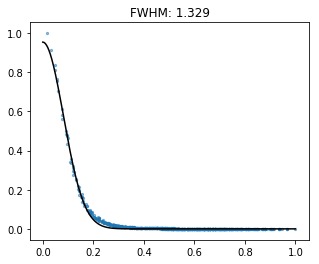

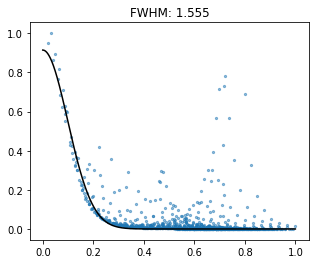

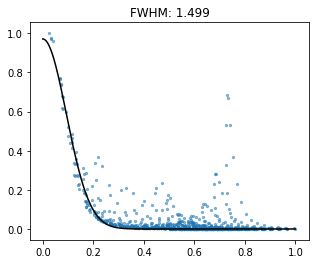

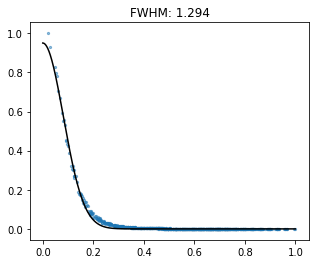

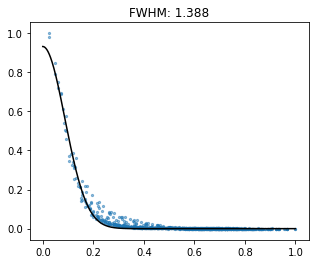

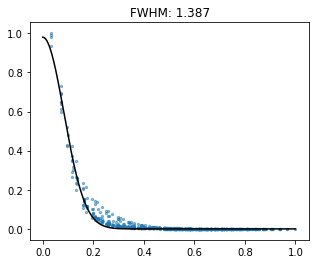

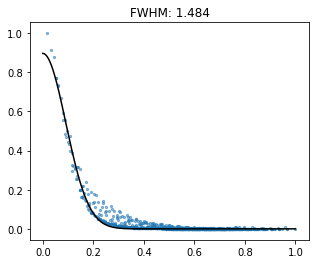

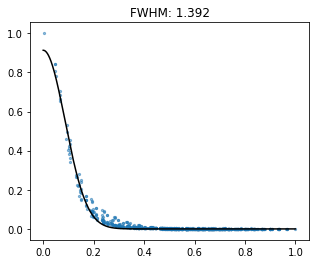

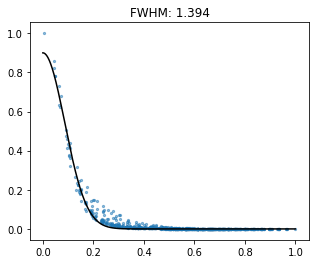

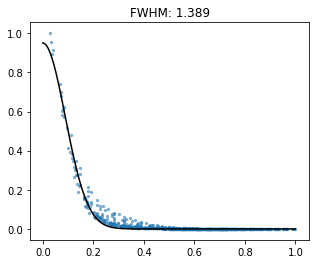

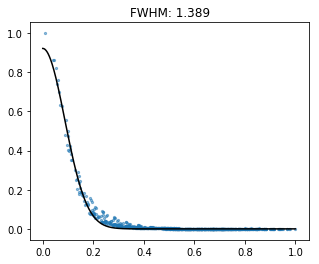

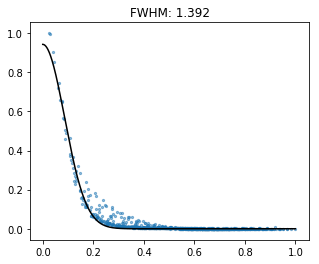

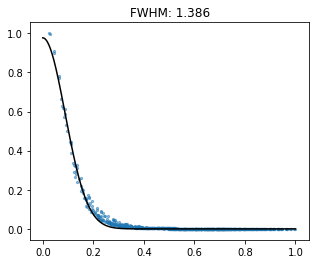

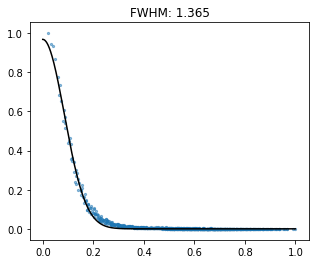

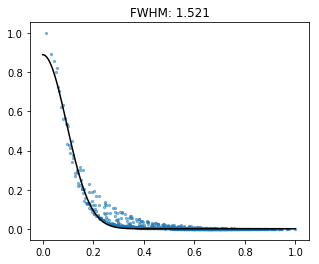

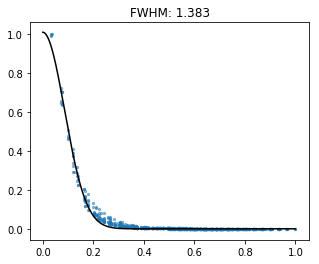

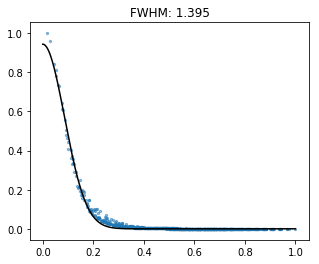

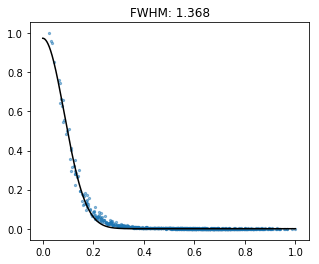

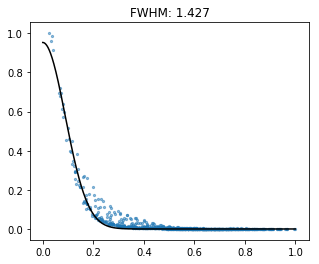

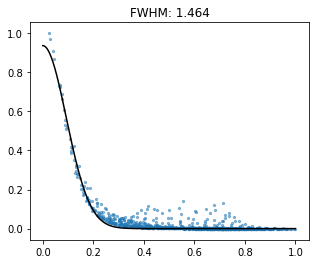

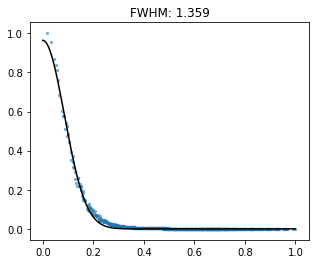

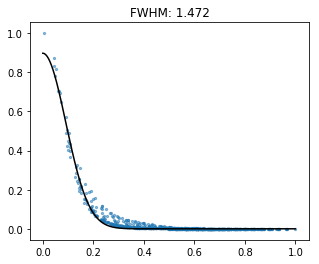

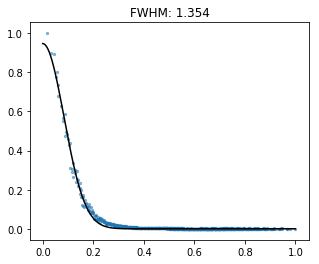

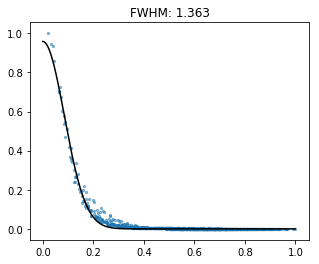

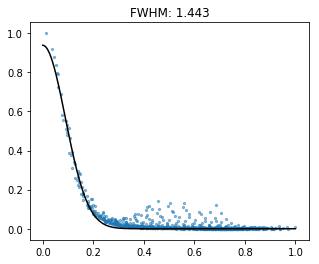

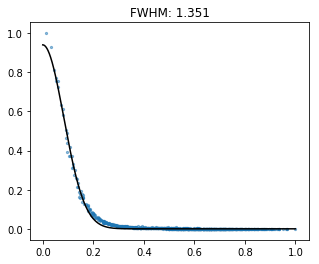

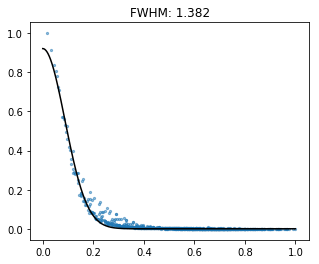

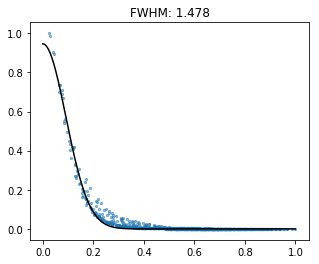

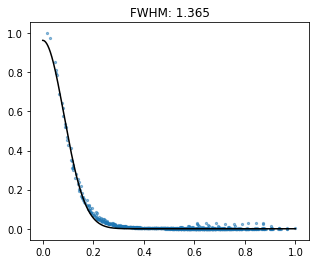

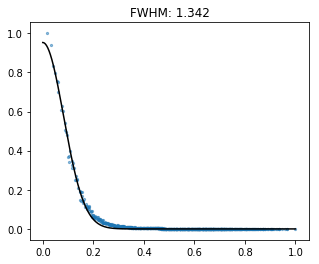

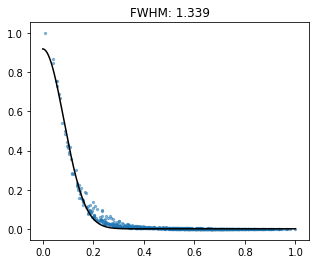

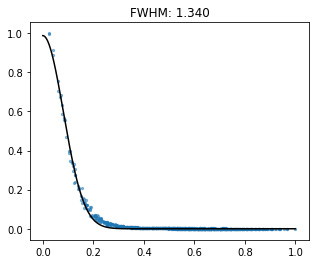

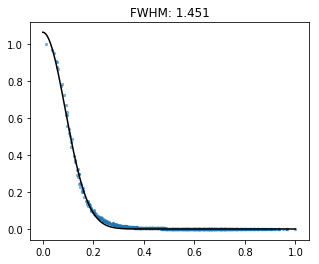

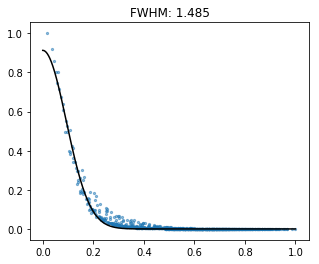

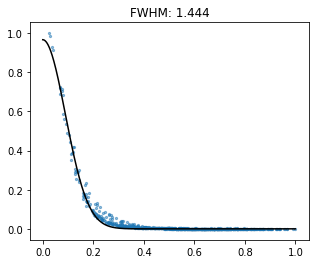

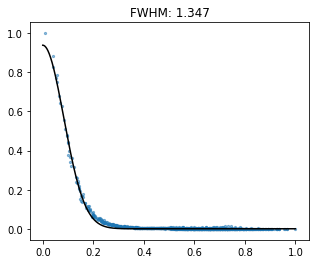

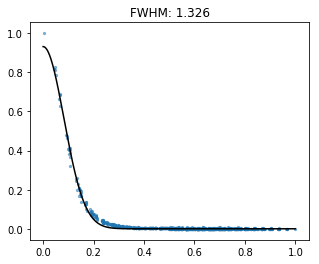

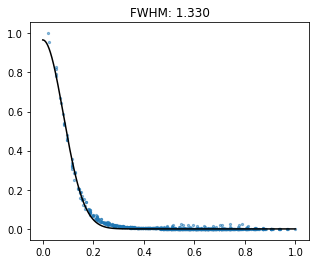

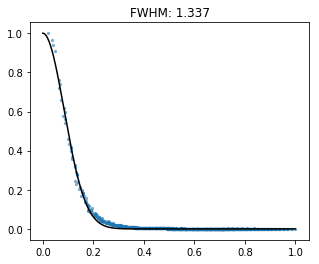

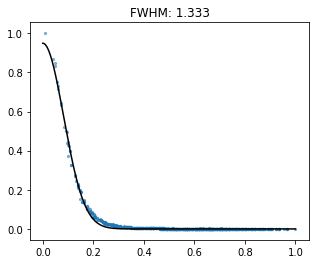

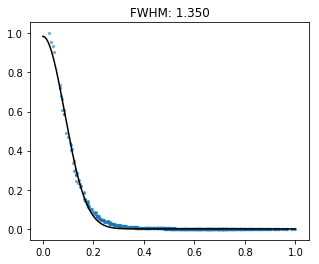

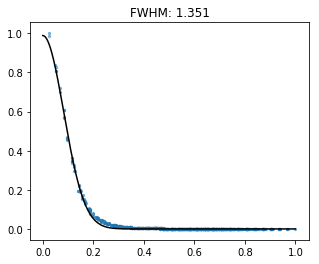

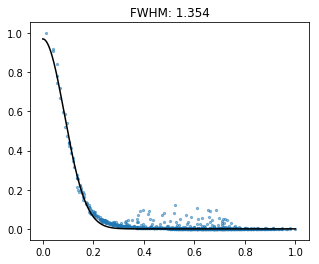

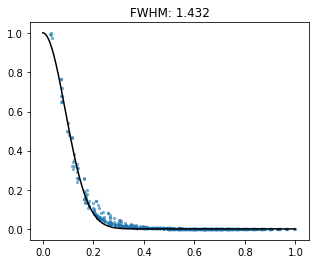

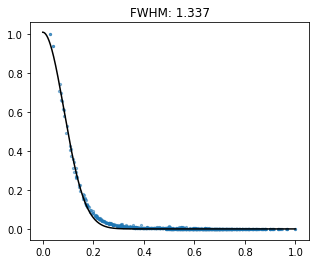

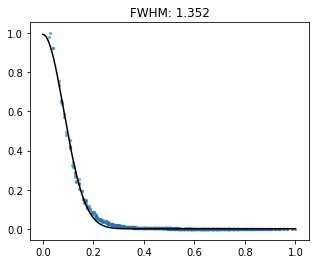

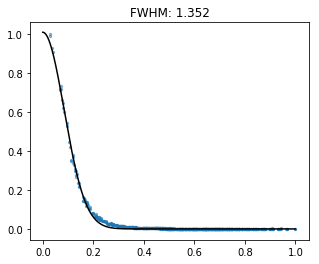

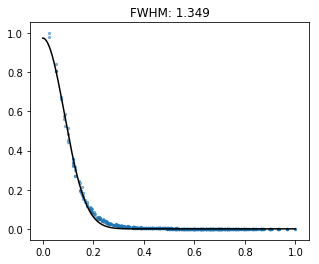

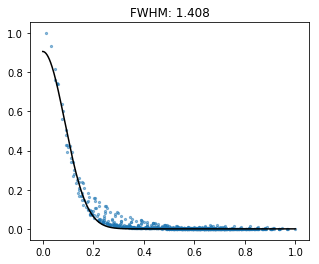

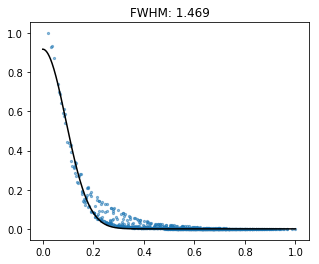

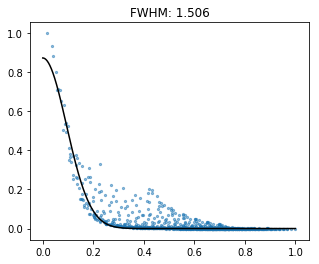

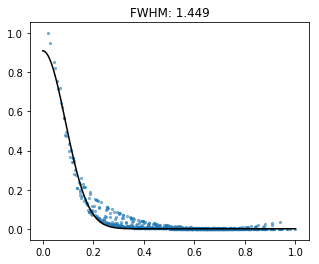

Median seeing FWHM in arcsec: 1.354


In [67]:
df.calculate_seeing(tab_sdss)

In [111]:
df = DeepFrame("/home/qliu/data/A2390F/A2390SE_C4.merged.InterferogramMerger.deep_frame.fits", name='A2390E',
               SE_catalog='./A2390SE/SE_DF/A2390E_DF_run2m.cat',
               seg_map='./A2390SE/SE_DF/segm_m2.fits',
               mask_edge="./proc/A2390E/A2390E_DF_edge.fits")

Saved background subtracted image as A2390E_DF.fits


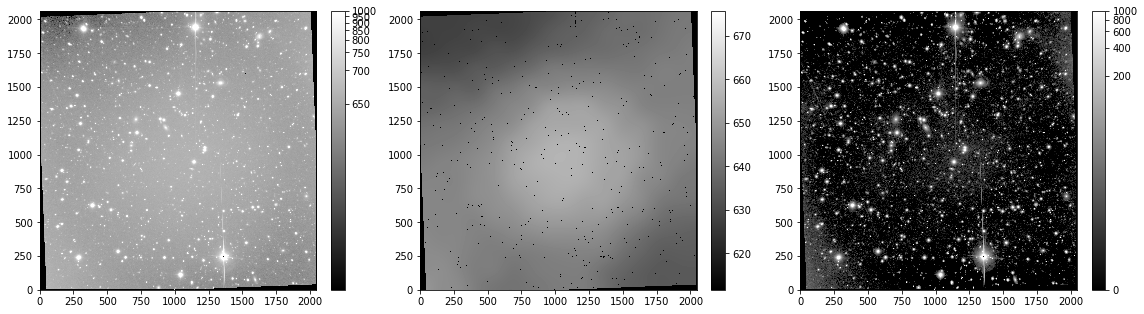

In [112]:
df.subtract_background(display=True, plot=True, save_path='./proc/A2390E/')

<Figure size 864x648 with 0 Axes>

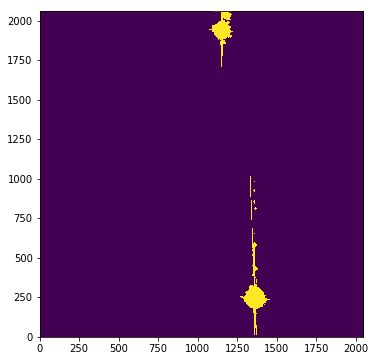

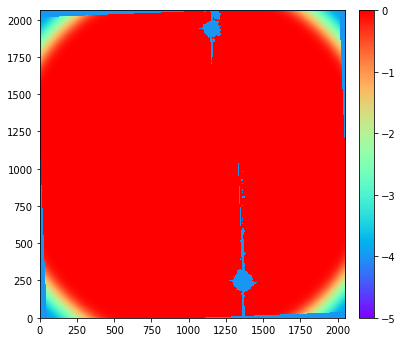

In [113]:
df.make_mask_streak("./proc/A2390E/A2390E_DF.fits", threshold=3, shape_cut=0.15, area_cut=500)
df.make_weight_map(thre=0.58, wt_min=1e-4, save_path="./proc/A2390E/")

# A2390W

In [99]:
df0 = DeepFrame("/home/qliu/data/A2390F/A2390NW_C4.merged.InterferogramMerger.deep_frame.fits", name='A2390W')
df0.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
EXTEND  =                    T                                                  
PROGRAM = 'ORB v3.1.2'         / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2017-11-08'         / Creation date                                  
MASK    = 'False   '                                                            
COMMENT                                                                         
COMMENT General                                                                 
COMMENT -------                                                                 
COMMENT                     

In [100]:
cube0 = Read_Datacube("/home/qliu/data/A2390F/A2390NWC4.fits", name='A2390W')
df0.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


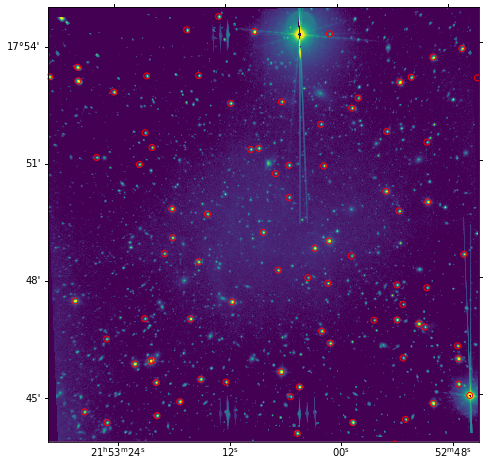

In [101]:
tab_sdss = df0.crossmatch_sdss(radius=7*u.arcmin,mag_max=18)
coords = np.vstack([np.array(tab_sdss["RA_ICRS"]), np.array(tab_sdss["DE_ICRS"])]).T
star_pos = df0.wcs.all_world2pix(coords, 0)

plt.figure(figsize=(8,8))
ax = plt.subplot(projection=df0.wcs)
plt.scatter(star_pos[:,0], star_pos[:,1], facecolor="none", edgecolor="r")
plt.imshow(df0.image, norm=norm1, origin="lower", vmin=np.median(df0.image), vmax=1e4)

Saved background subtracted image as A2390W_DF_noSE.fits


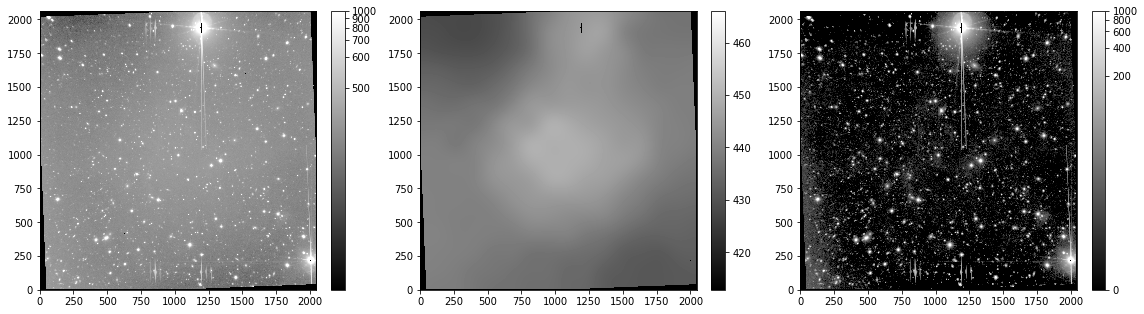

In [102]:
df0.make_mask_edge(save_path='./proc/A2390W/')
df0.subtract_background(display=True, plot=True, save_path='./proc/A2390W/', suffix='_noSE')

In [103]:
df = DeepFrame("./proc/A2390W/A2390W_DF_noSE.fits", name='A2390W',
               SE_catalog='./A2390NW/SE_DF/A2390W_DF_run1m.cat',
               seg_map='./A2390NW/SE_DF/segm_m1.fits',
               mask_edge="./proc/A2390W/A2390W_DF_edge.fits")
df.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


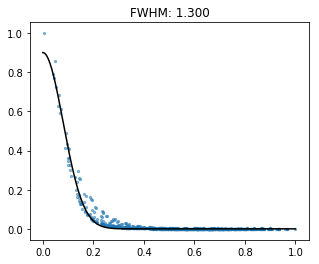

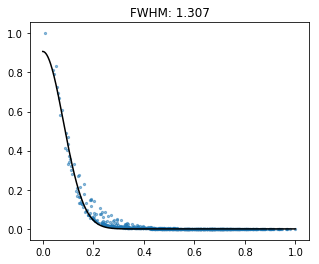

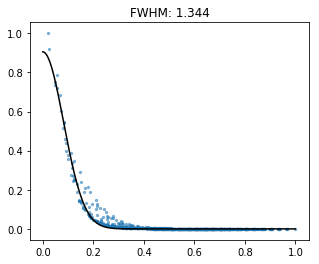

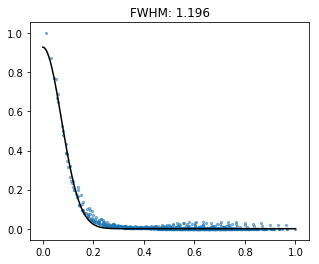

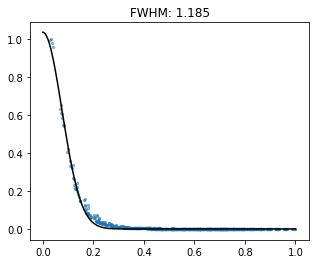

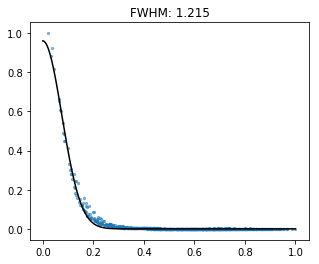

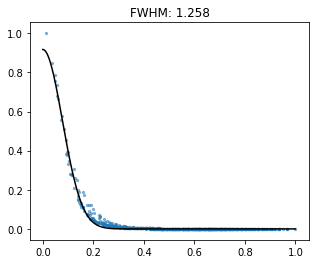

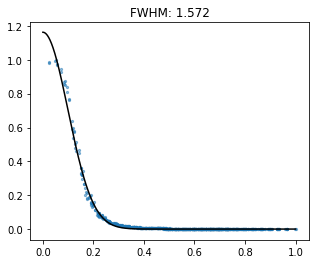

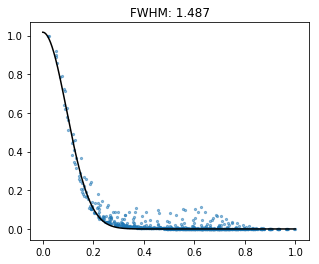

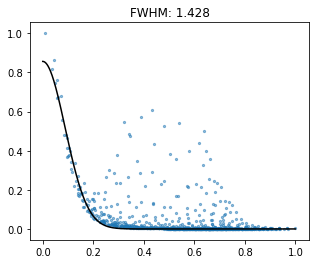

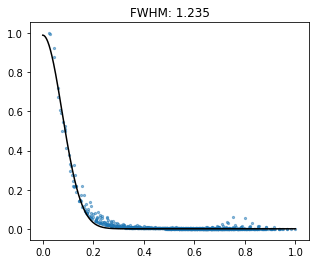

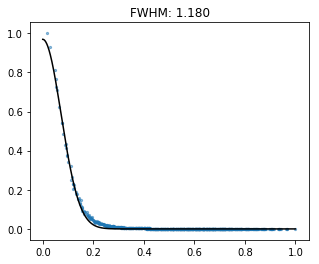

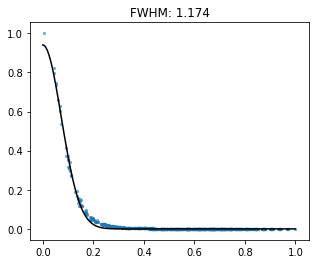

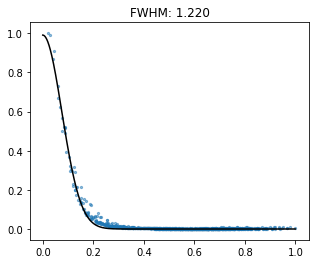

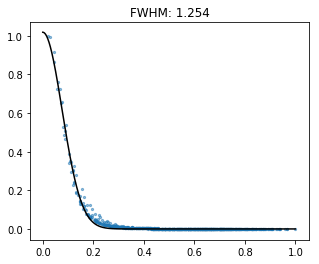

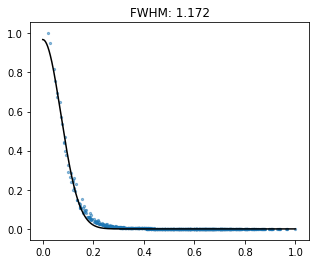

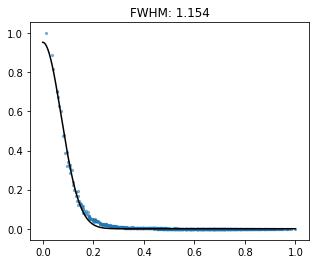

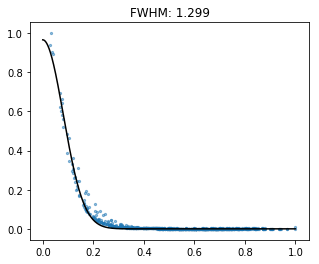

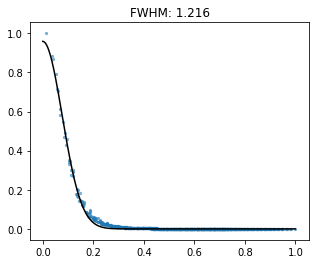

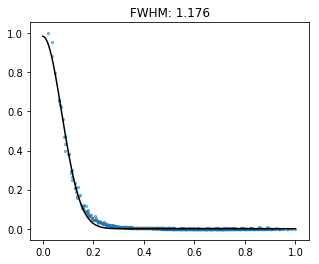

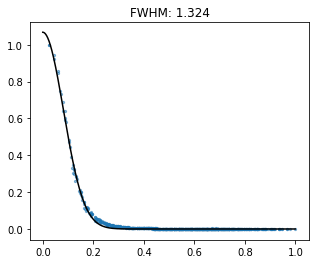

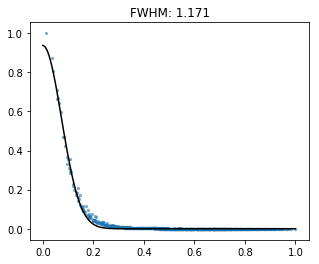

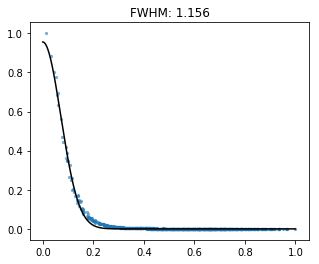

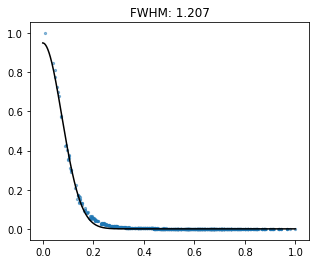

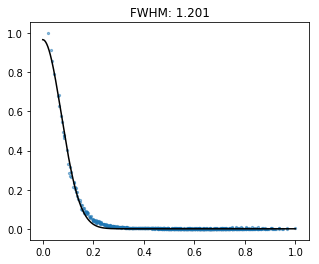

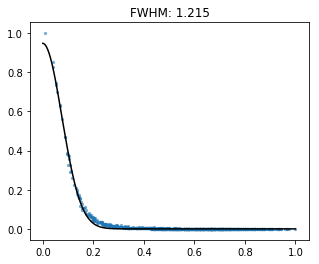

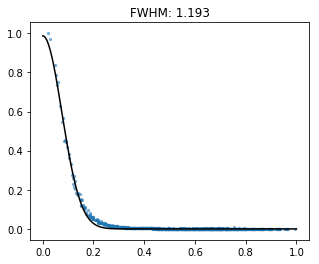

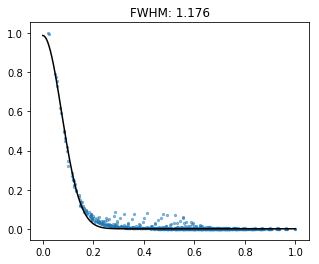

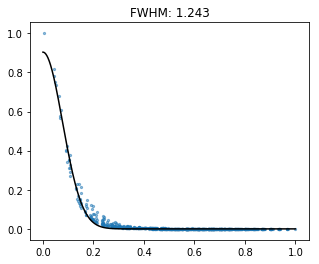

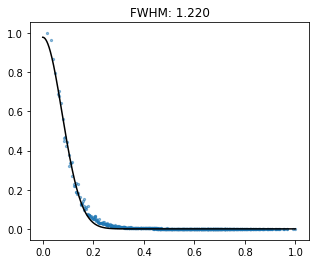

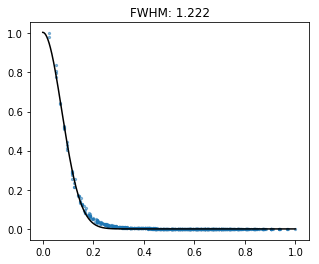

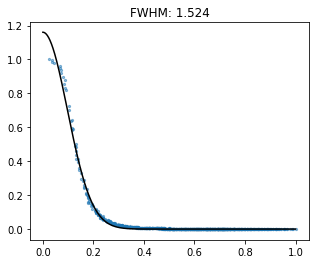

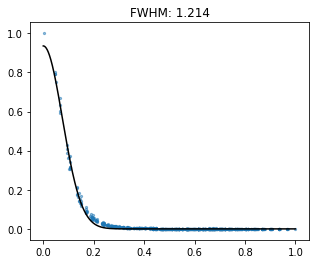

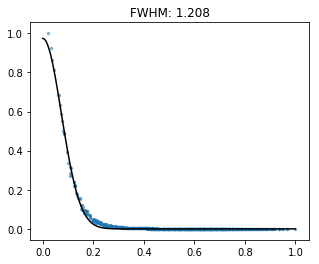

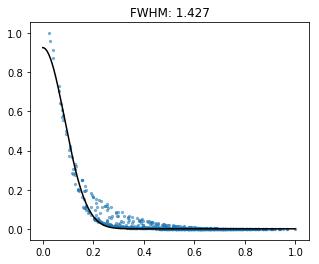

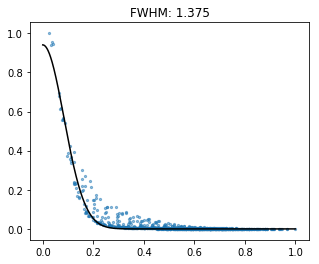

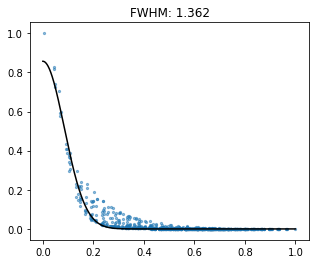

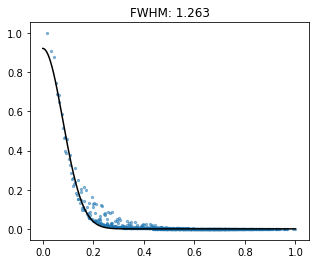

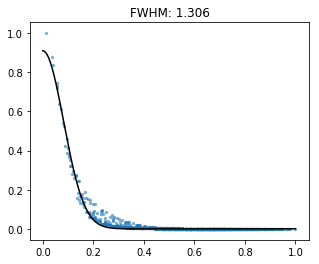

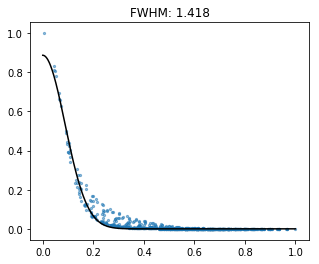

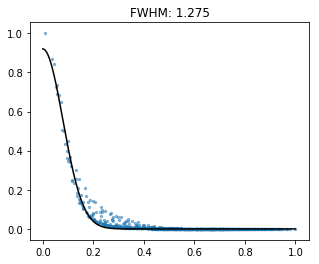

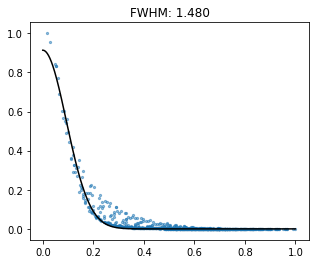

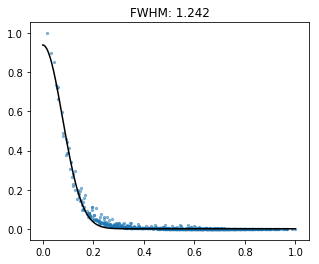

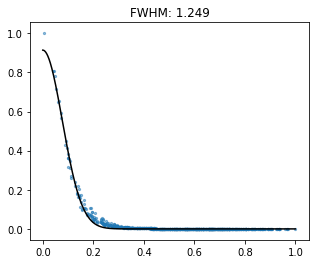

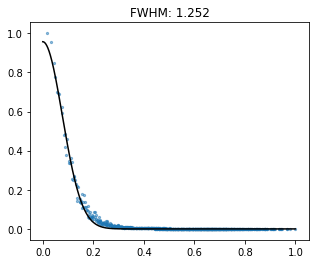

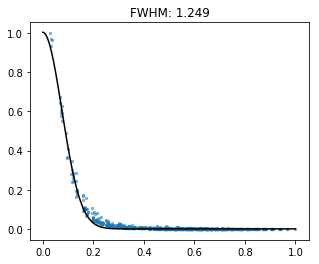

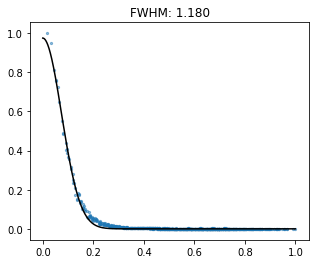

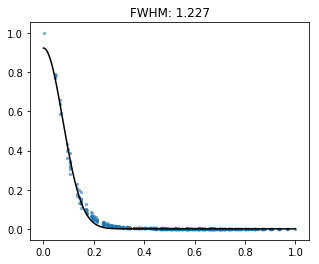

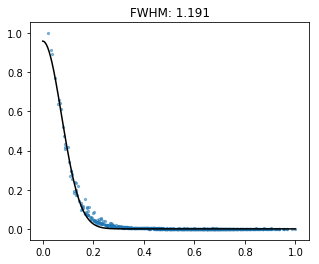

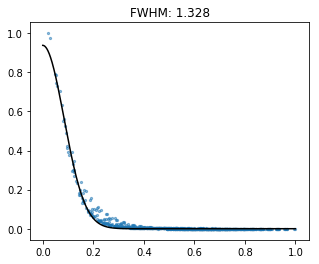

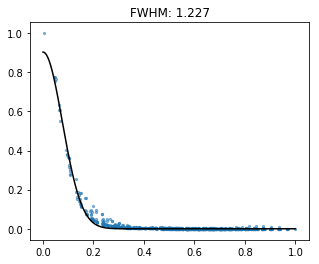

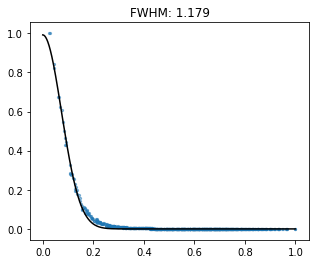

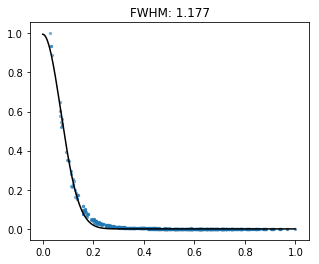

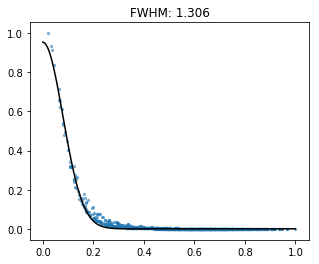

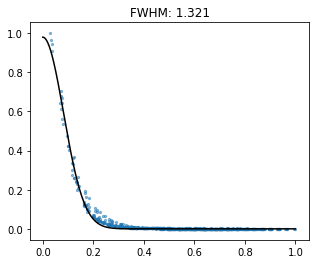

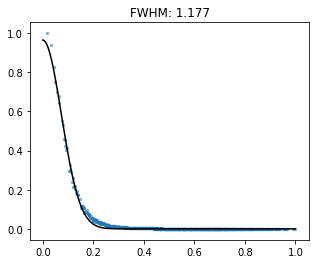

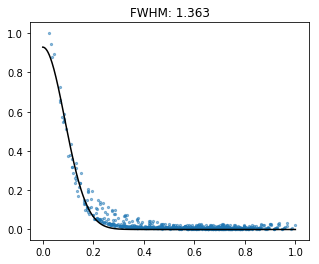

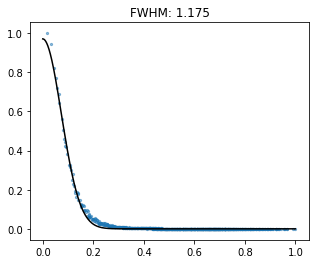

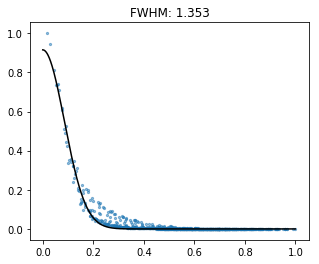

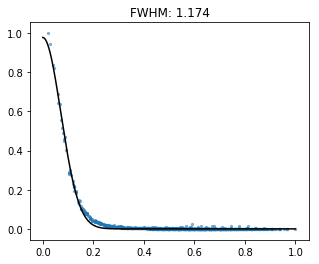

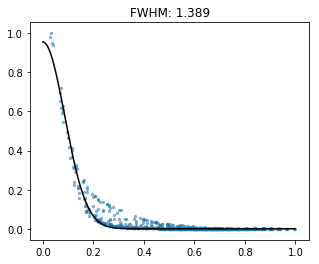

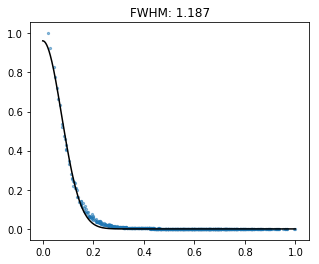

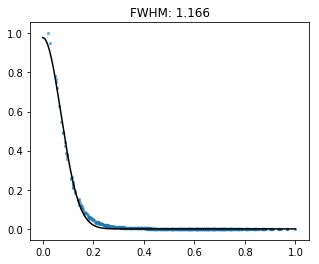

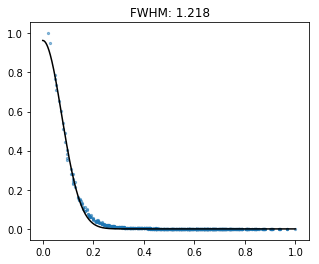

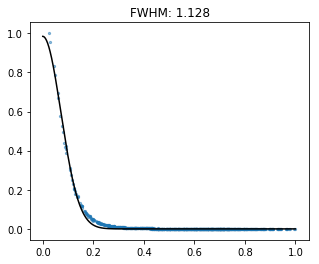

Median seeing FWHM in arcsec: 1.227


In [104]:
df.calculate_seeing(tab_sdss)

In [105]:
df = DeepFrame("/home/qliu/data/A2390F/A2390NW_C4.merged.InterferogramMerger.deep_frame.fits", name='A2390W',
               SE_catalog='./A2390NW/SE_DF/A2390W_DF_run2m.cat',
               seg_map='./A2390NW/SE_DF/segm_m2.fits',
               mask_edge="./proc/A2390W/A2390W_DF_edge.fits")

Saved background subtracted image as A2390W_DF.fits


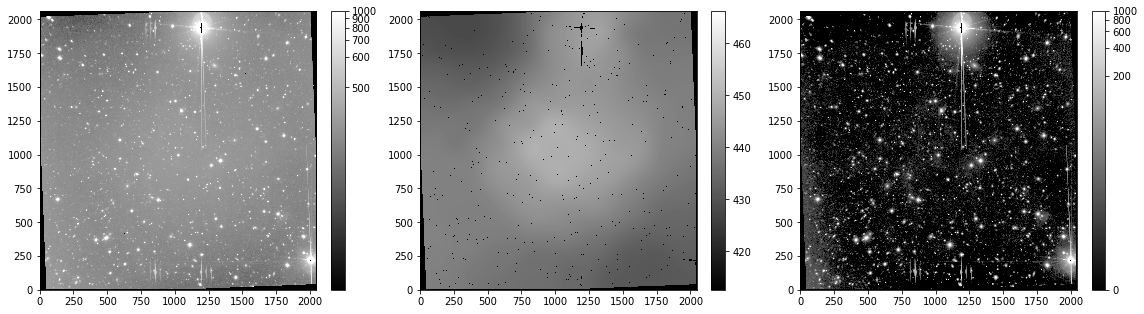

In [106]:
df.subtract_background(display=True, plot=True, save_path='./proc/A2390W/')

<Figure size 864x648 with 0 Axes>

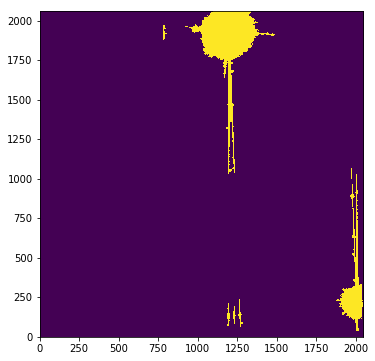

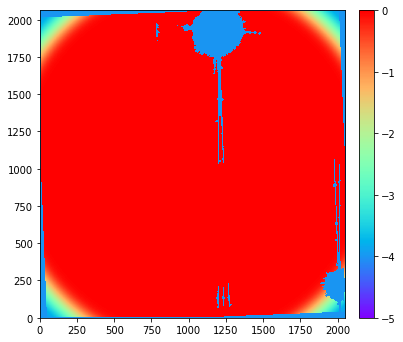

In [109]:
df.make_mask_streak("./proc/A2390W/A2390W_DF.fits", threshold=3, shape_cut=0.15, area_cut=500)
df.make_weight_map(thre=0.58, wt_min=1e-4, save_path="./proc/A2390W/")

# A2465C

In [3]:
df0 = DeepFrame("/home/qliu/data/A2465/5PrUCR/2345354v.fits", name='A2465C')
df0.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
EXTEND  =                    T                                                  
PROGRAM = 'ORB v3.4'           / Thomas Martin: thomas.martin.1@ulaval.ca       
DATE    = '2019-01-18'         / Creation date                                  
MASK    = 'False   '                                                            
COMMENT                                                                         
COMMENT General                                                                 
COMMENT -------                                                                 
COMMENT                     

In [4]:
cube0 = Read_Datacube("/home/qliu/data/A2465/5PrUCR/2345354p.fits", name='A2390W')
df0.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


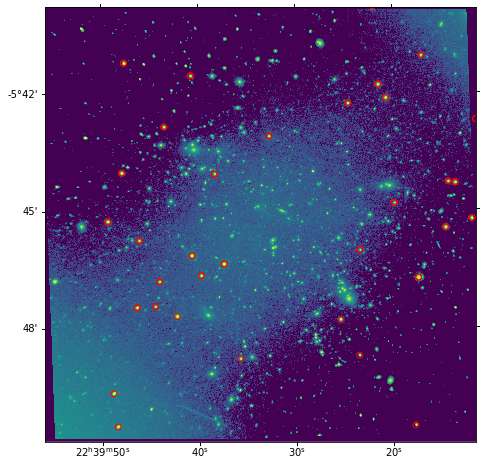

In [7]:
tab_sdss = df0.crossmatch_sdss(radius=7*u.arcmin,mag_max=18)
coords = np.vstack([np.array(tab_sdss["RA_ICRS"]), np.array(tab_sdss["DE_ICRS"])]).T
star_pos = df0.wcs.all_world2pix(coords, 0)

plt.figure(figsize=(8,8))
ax = plt.subplot(projection=df0.wcs)
plt.scatter(star_pos[:,0], star_pos[:,1], facecolor="none", edgecolor="r")
plt.imshow(df0.image, norm=norm1, origin="lower", vmin=np.median(df0.image), vmax=1e3)

Saved background subtracted image as A2465C_DF_noSE.fits


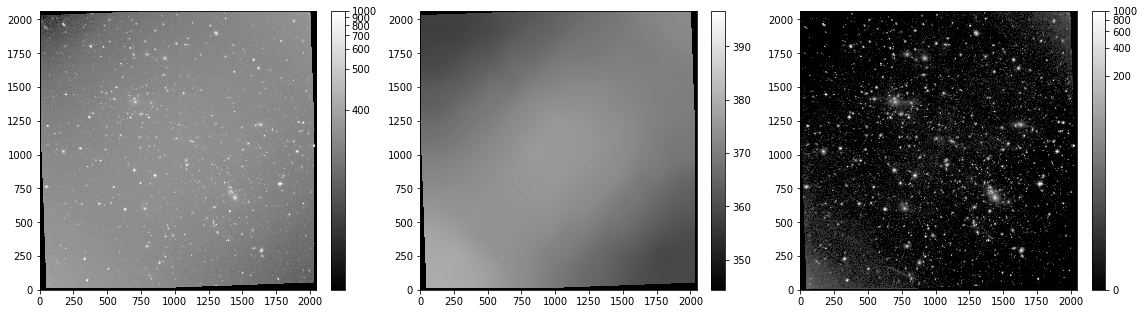

In [6]:
df0.make_mask_edge(save_path='./proc/A2465C/')
df0.subtract_background(display=True, plot=True, save_path='./proc/A2465C/', suffix='_noSE')

In [8]:
df = DeepFrame("./proc/A2465C/A2465C_DF_noSE.fits", name='A2465C',
               SE_catalog='./A2465C/SE_DF/A2465C_DF_run1m.cat',
               seg_map='./A2465C/SE_DF/segm_m1.fits',
               mask_edge="./proc/A2465C/A2465C_DF_edge.fits")
df.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


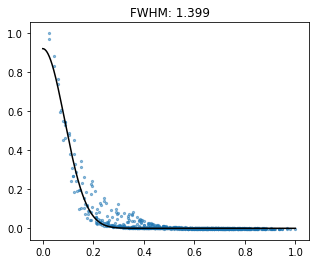

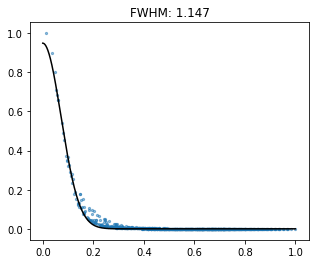

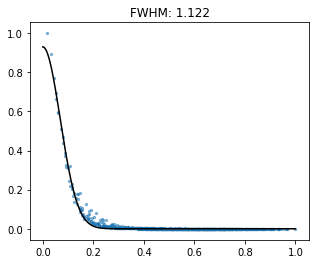

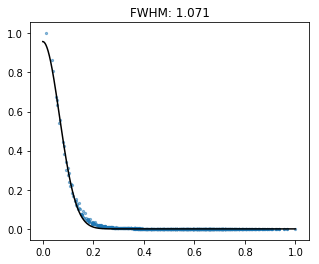

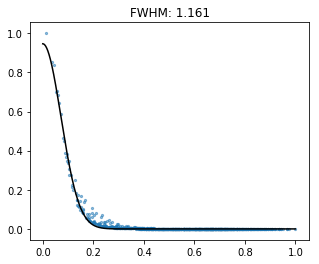

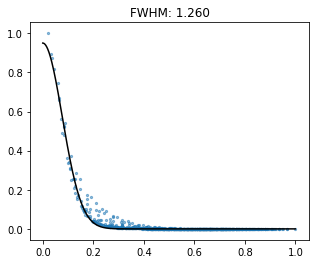

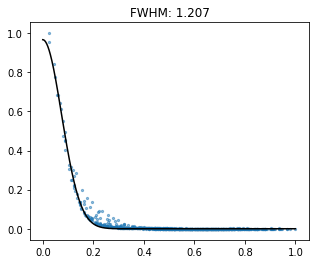

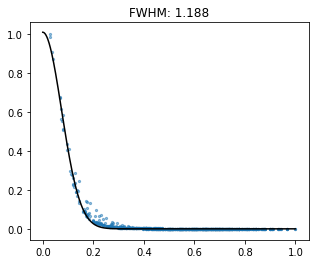

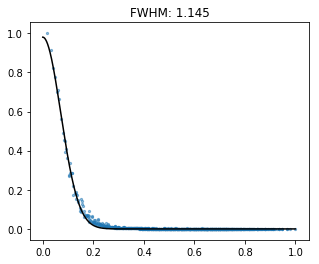

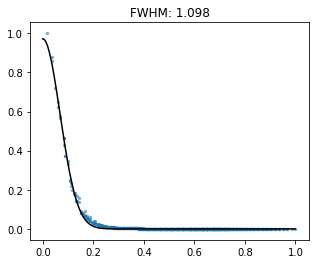

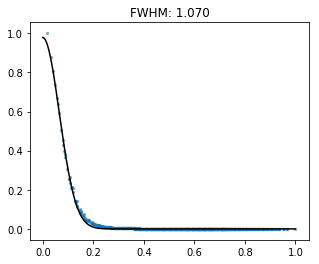

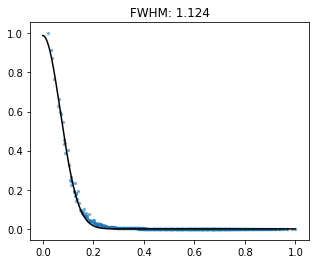

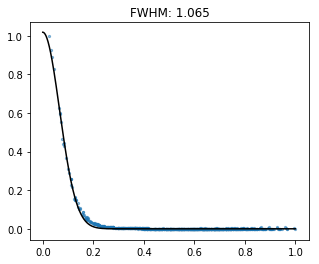

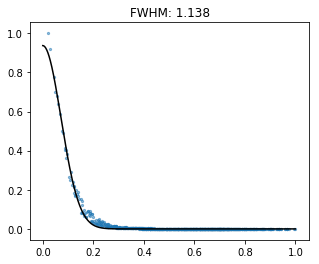

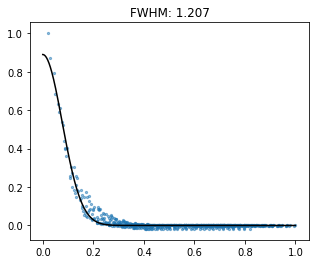

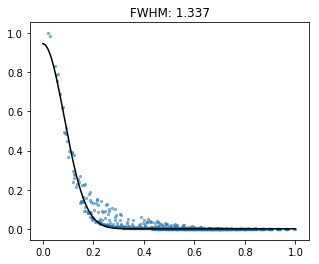

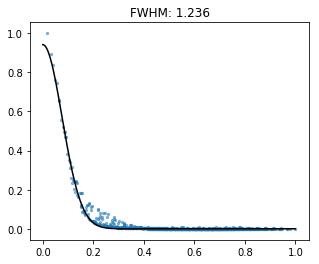

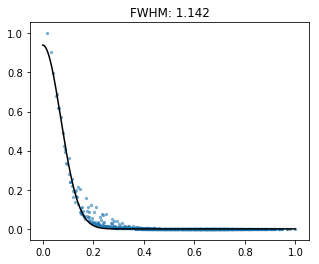

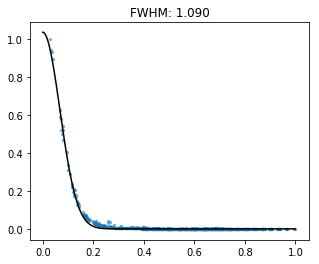

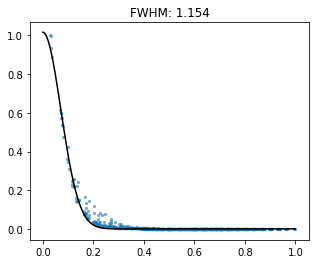

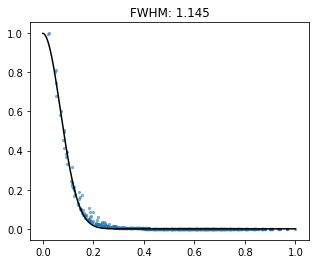

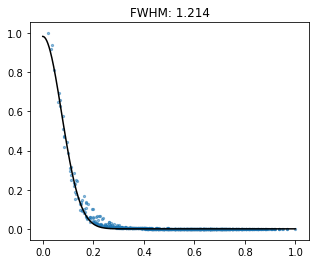

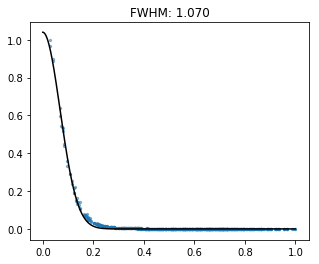

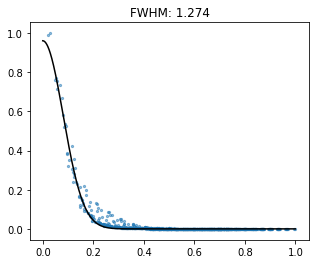

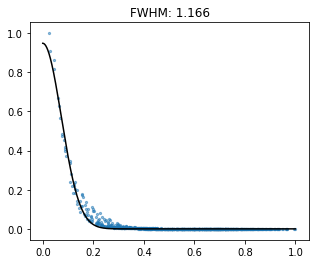

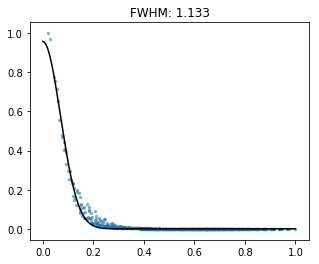

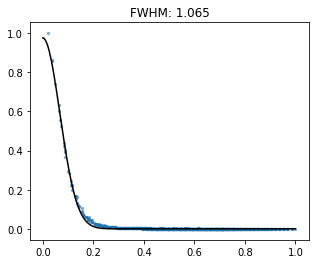

Median seeing FWHM in arcsec: 1.145


In [9]:
df.calculate_seeing(tab_sdss)

In [14]:
df = DeepFrame("./proc/A2465C/A2465C_DF_noSE.fits", name='A2465C',
               SE_catalog='./A2465C/SE_DF/A2465C_DF_run2m.cat',
               seg_map='./A2465C/SE_DF/segm_m2.fits',
               mask_edge="./proc/A2465C/A2465C_DF_edge.fits")
df.wcs = WCS(cube0.header,naxis=2)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


Saved background subtracted image as A2465C_DF.fits


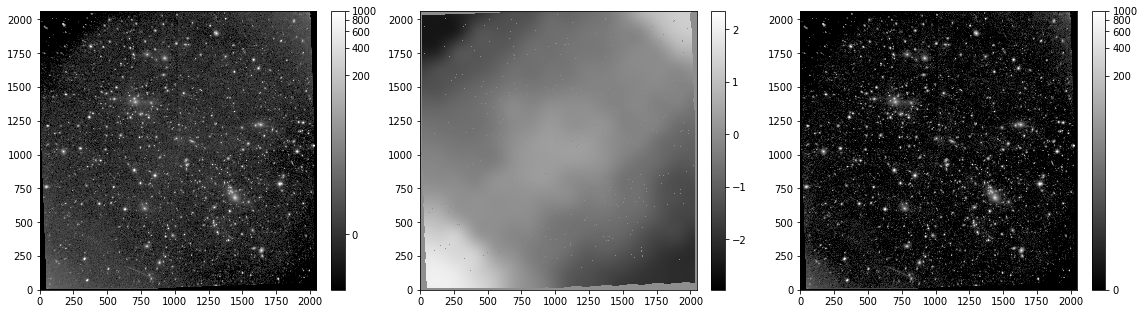

In [15]:
df.subtract_background(display=True, plot=True, save_path='./proc/A2465C/')